In [2]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
import torch
import sys
sys.path.append('../')
from latent_rationale.nn.kuma import Kuma, HardKuma
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.max_colwidth = 1000


In [3]:
a = widgets.FloatSlider(description='a =', min=0.01, max=10)
b = widgets.FloatSlider(description='b =', min=0.01, max=10)

In [4]:
%matplotlib widget
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Kumaraswamy DIstribution

In [127]:
display(a, b)

FloatSlider(value=0.01, description='a =', max=10.0, min=0.01)

FloatSlider(value=0.5, description='b =', max=10.0, min=0.01)

In [152]:
dist = HardKuma([torch.tensor(a.value), torch.tensor(b.value)], support=(-0.1, 1.1))
print(dist.pdf(0.0))


def plot(dist):
    x = np.linspace(-0.1, 1.1)
    p = dist.pdf(torch.from_numpy(x).float())
    print(p)
    plt.plot(x, p)
    plt.title(f'{dist.__class__.__name__}(a={a.value}, b={b.value}) PDF')


tensor([0.0426])


tensor([0.2887, 0.2887, 0.2887, 0.2887, 0.2887, 0.4397, 0.4448, 0.4501, 0.4555,
        0.4612, 0.4670, 0.4731, 0.4795, 0.4861, 0.4930, 0.5002, 0.5077, 0.5156,
        0.5238, 0.5325, 0.5416, 0.5512, 0.5613, 0.5720, 0.5833, 0.5954, 0.6082,
        0.6218, 0.6365, 0.6522, 0.6691, 0.6875, 0.7074, 0.7292, 0.7531, 0.7795,
        0.8089, 0.8420, 0.8794, 0.9223, 0.9722, 1.0312, 1.1024, 1.1907, 1.3044,
        0.2887, 0.2887, 0.2887, 0.2887, 0.2887])
tensor([   nan,    nan,    nan,    nan,    nan, 0.5057, 0.5122, 0.5189, 0.5259,
        0.5331, 0.5407, 0.5486, 0.5569, 0.5655, 0.5746, 0.5841, 0.5942, 0.6047,
        0.6158, 0.6276, 0.6401, 0.6533, 0.6674, 0.6825, 0.6986, 0.7159, 0.7346,
        0.7548, 0.7768, 0.8009, 0.8273, 0.8565, 0.8890, 0.9256, 0.9670, 1.0146,
        1.0700, 1.1356, 1.2149, 1.3135, 1.4409, 1.6144, 1.8708, 2.3078, 3.3372,
           nan,    nan,    nan,    nan,    nan])


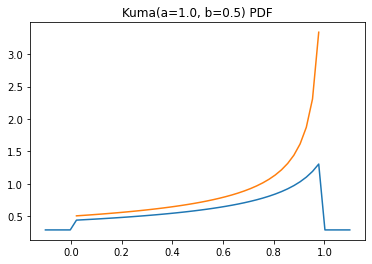

In [150]:
plot(HardKuma([torch.tensor(a.value), torch.tensor(b.value)], support=(-0.1, 1.1)))
plot(Kuma([torch.tensor(a.value), torch.tensor(b.value)]))

## Masked Sentences

In [10]:
file = '../masked_examples_minibert_l03.json'

import re
df = pd.read_json(file)
df.rename({ 'original': 'Original Sentence', 'masked': 'Masked Sentence' }, axis=1, inplace=True)
df = df.applymap(lambda x: re.sub(r'\[SEP\]$', '', x).replace(r'[CLS]', r'Premise:').replace('[SEP]', r'Hypothesis:'))
df

,Original Sentence,Masked Sentence
0,Premise: two people are playing american football and one of them is trying to stop the other from throwing the ball. Hypothesis: a game of football is being played.,[MASK] [MASK] [MASK] [MASK] playing american football [MASK] [MASK] [MASK] [MASK] [MASK] trying [MASK] stop [MASK] [MASK] [MASK] throwing [MASK] ball [MASK] [MASK] [MASK] game [MASK] football [MASK] being played [MASK] [MASK]
1,"Premise: two dogs, the gray poodle high in the air, play on the grass. Hypothesis: the animals are lying on the bed.",[MASK] [MASK] dogs [MASK] [MASK] [MASK] poodle high [MASK] [MASK] [MASK] [MASK] play [MASK] [MASK] grass [MASK] [MASK] the animals [MASK] lying [MASK] the bed [MASK] [MASK]
2,Premise: a group of women and men are in the water wit their clothes on. Hypothesis: they are people in the water with clothes on.,[MASK] [MASK] [MASK] [MASK] women [MASK] men [MASK] [MASK] [MASK] water [MASK] [MASK] clothes [MASK] [MASK] [MASK] they [MASK] people [MASK] the water [MASK] clothes [MASK] [MASK] [MASK]
3,Premise: a man is riding a bike along a dirt trail. Hypothesis: the man is bike riding.,[MASK] [MASK] [MASK] [MASK] riding [MASK] bike [MASK] [MASK] dirt trail [MASK] [MASK] the [MASK] [MASK] bike riding [MASK] [MASK]
4,Premise: two construction workers climbing the steel ribbed exterior of a new building at their work site. Hypothesis: the workers are climbing to build the steeple.,[MASK] [MASK] construction workers climbing [MASK] steel ribbed exterior [MASK] [MASK] new building [MASK] [MASK] work [MASK] [MASK] [MASK] the workers [MASK] climbing to build the steeple [MASK] [MASK]
5,Premise: a black and white bird with a yellow beak is flying. Hypothesis: flying black and white bird,[MASK] [MASK] black [MASK] white bird [MASK] [MASK] yellow beak [MASK] flying [MASK] [MASK] flying black [MASK] white bird [MASK]
6,Premise: a young boy dressed in black and green is laying down in a tent outside with items surrounding him. Hypothesis: a girl lays down in front of a tent,[MASK] [MASK] [MASK] [MASK] dressed [MASK] black [MASK] green [MASK] laying [MASK] [MASK] [MASK] tent outside [MASK] items surrounding [MASK] [MASK] [MASK] [MASK] girl lays down [MASK] front [MASK] [MASK] tent [MASK]
7,"Premise: the player in the white dribbles the ball, while the player in the orange tries to stop him. Hypothesis: a player in white readies to hit with his baseball bat, while a player in orange motions to pitch the ball.",[MASK] [MASK] player [MASK] [MASK] white dribbles [MASK] ball [MASK] [MASK] [MASK] player [MASK] [MASK] orange tries [MASK] stop [MASK] [MASK] [MASK] [MASK] player [MASK] white readies to hit [MASK] his baseball bat [MASK] [MASK] [MASK] player [MASK] orange motions to pitch the ball [MASK] [MASK]
8,Premise: a woman walking down a crowded sidewalk talking on her cellphone. Hypothesis: a woman is running on the track.,[MASK] [MASK] woman walking [MASK] [MASK] crowded sidewalk talking [MASK] [MASK] cell [MASK] [MASK] [MASK] [MASK] woman [MASK] running [MASK] the track [MASK] [MASK]
9,"Premise: people are all standing together in front of a statue of an animal, and they are all wearing cool - weather clothing. Hypothesis: people wearing cool - weather clothing because of the excessive wind.",[MASK] [MASK] [MASK] all standing [MASK] [MASK] [MASK] [MASK] [MASK] statue [MASK] [MASK] animal [MASK] [MASK] they [MASK] all [MASK] cool [MASK] weather clothing [MASK] [MASK] people [MASK] cool [MASK] weather clothing because [MASK] the excessive wind [MASK] [MASK]


In [197]:
print(df.loc[[0, 1]].to_latex(index=False, escape=False))

\begin{tabular}{ll}
\toprule
                                                                                                                                                                                                               Original Sentence &                                                                                                                                                                                                                                             Masked Sentence \\
\midrule
\shortstack{\emph{Premise}: a woman poses with sunglasses shaped like dollar signs and a silver suitcase labelled'lucky'full of bills. \\ \emph{Hypothesis:} a woman is wearing black sunglasses and holding a black suitcase. } & \shortstack{\emph{Premise}: [MASK] woman poses [MASK] sunglasses shaped like dollar signs [MASK] [MASK] silver suitcase labelled'lucky'full [MASK] bills. [MASK] [MASK] woman [MASK] wearing black sunglasses [MASK] holding [MASK] black suitcase. [MASK]} \